1. Create a straight line dataset using the linear regression formula (weight * X + bias).
Set weight=0.3 and bias=0.9 there should be at least 100 datapoints total.
Split the data into 80% training, 20% testing.
Plot the training and testing data so it becomes visual.

In [17]:
import torch
from torch import nn
import matplotlib.pyplot as plt


# Device agnostic: use GPU if available, else CPU.
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

# Create the data parameters
weights = 0.3
bias = 0.9

#creating input data
start = 0
end = 1
step = 0.01

# Create 100 evenly spaced points between 0 and 1.
X = torch.arange(start, end, step).unsqueeze(1).to(device)  # shape: [100, 1]

# Make X and y using linear regression feature
y = weights * X + bias

# Show a few sample datapoints.
print(f"Number of X samples: {len(X)}")
print(f"Number of y samples: {len(y)}")
print(f"First 10 X & y samples:\nX: {X[:10]}\ny: {y[:10]}")

Using device: cuda
Number of X samples: 100
Number of y samples: 100
First 10 X & y samples:
X: tensor([[0.0000],
        [0.0100],
        [0.0200],
        [0.0300],
        [0.0400],
        [0.0500],
        [0.0600],
        [0.0700],
        [0.0800],
        [0.0900]], device='cuda:0')
y: tensor([[0.9000],
        [0.9030],
        [0.9060],
        [0.9090],
        [0.9120],
        [0.9150],
        [0.9180],
        [0.9210],
        [0.9240],
        [0.9270]], device='cuda:0')


In [18]:
# Split the data into training and testing
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

print(f"Training set size: {len(X_train)}")
print(f"Training label size: {len(y_train)}")
print(f"Testing set size: {len(X_test)}")
print(f"Testing label size: {len(y_test)}")

Training set size: 80
Training label size: 80
Testing set size: 20
Testing label size: 20


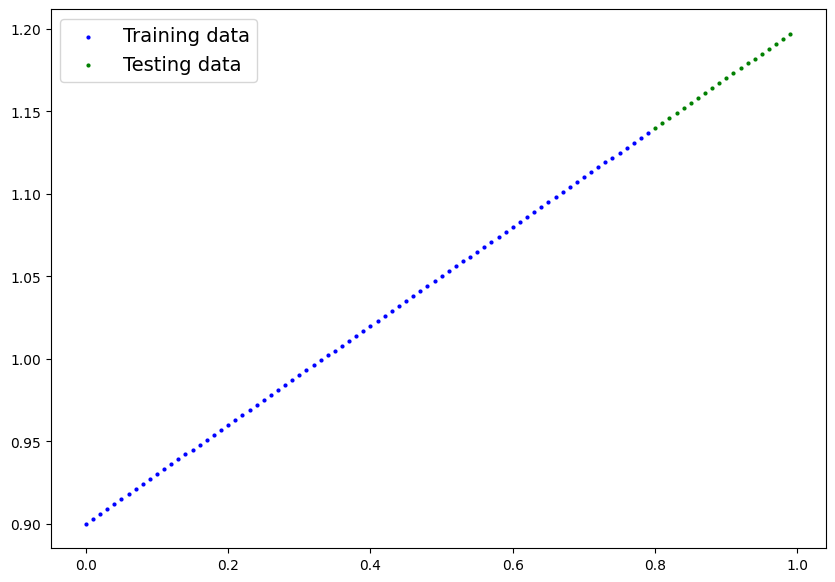

In [21]:
# Plot the training and testing data

def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
  # Plots training data, test data and compares predictions.
  plt.figure(figsize=(10, 7))
  # Plot training data in blue
  # Move data to CPU and convert to NumPy before plotting
  plt.scatter(train_data.cpu().numpy(), train_labels.cpu().numpy(), c="b", s=4, label="Training data")
  # Plot testing data in green
  # Move data to CPU and convert to NumPy before plotting
  plt.scatter(test_data.cpu().numpy(), test_labels.cpu().numpy(), c="g", s=4, label="Testing data")
  if predictions is not None:
    # Plot the predictions in red (predictions were made on the test data)
    plt.scatter(test_data.cpu().numpy(), predictions, c="r", s=4, label="Predictions")
  # Show the legend
  plt.legend(prop={"size": 14});
plot_predictions();

2. Build a PyTorch model by subclassing nn.Module.
Inside should be a randomly initialized nn.Parameter() with requires_grad=True, one for weights and one for bias.
Implement the forward() method to compute the linear regression function you used to create the dataset in 1.
Once you've constructed the model, make an instance of it and check its state_dict().
Note: If you'd like to use nn.Linear() instead of nn.Parameter() you can.

In [25]:
# Create PyTorch linear regression model by subclassing nn.Module
class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1, dtype=torch.float, device=device, requires_grad=True))
    self.bias = nn.Parameter(torch.randn(1, dtype=torch.float, device=device, requires_grad=True))
  # Forward defines the computation in the model
  def forward(self, x: torch.Tensor) -> torch.Tensor: # <- "x" is the input data (e.g. training/testing features)
      return self.weights * x + self.bias # <- this is the linear regression formula (y = m*x + b)

In [26]:
# Instantiate the model and put it to the target device
model_0 = LinearRegressionModel().to(device)

# Check model parameters
print("Model state_dict:", model_0.state_dict())

Model state_dict: OrderedDict([('weights', tensor([0.4931], device='cuda:0')), ('bias', tensor([-0.4421], device='cuda:0'))])


3. Create a loss function and optimizer using nn.L1Loss() and torch.optim.SGD(params, lr) respectively.
Set the learning rate of the optimizer to be 0.01 and the parameters to optimize should be the model parameters from the model you created in 2.
Write a training loop to perform the appropriate training steps for 300 epochs.
The training loop should test the model on the test dataset every 20 epochs.

In [27]:
# Create the loss function and optimizer
loss_fn = nn.L1Loss()  # Mean Absolute Error (MAE)
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.01)

In [31]:
# Training loop
epochs = 300

# Track loss values
train_loss_values = []
test_loss_values = []
epoch_count = []

for epoch in range(epochs):
    ### Training
    # Put model in training mode (this is the default state of a model)
    model_0.train()
    # 1. Forward pass
    y_pred = model_0(X_train)
    # 2. Calculate loss (loss is a Tensor of shape [1])
    loss = loss_fn(y_pred, y_train)
    # 3. Zero gradients
    optimizer.zero_grad()
    # 4. Backpropagation
    loss.backward()
    # 5. step the optimizer
    optimizer.step()

    ### Testing

    model_0.eval()  # Set model to evaluation mode
    with torch.inference_mode():
        # 1. Forward pass on test data
        test_pred = model_0(X_test)
        # 2. Caculate loss on test data
        test_loss = loss_fn(test_pred, y_test.type(torch.float))
    if epoch % 20 == 0:
        epoch_count.append(epoch)
        train_loss_values.append(loss.detach().cpu().numpy())  # Convert to NumPy before storing
        test_loss_values.append(test_loss.detach().cpu().numpy())

        # Print out what's happening
        print(f"Epoch: {epoch} | Train loss: {loss:.3f} | Test loss: {test_loss:.3f}")


Epoch: 0 | Train loss: 0.008 | Test loss: 0.006
Epoch: 20 | Train loss: 0.008 | Test loss: 0.006
Epoch: 40 | Train loss: 0.008 | Test loss: 0.006
Epoch: 60 | Train loss: 0.008 | Test loss: 0.006
Epoch: 80 | Train loss: 0.008 | Test loss: 0.006
Epoch: 100 | Train loss: 0.008 | Test loss: 0.006
Epoch: 120 | Train loss: 0.008 | Test loss: 0.006
Epoch: 140 | Train loss: 0.008 | Test loss: 0.006
Epoch: 160 | Train loss: 0.008 | Test loss: 0.006
Epoch: 180 | Train loss: 0.008 | Test loss: 0.006
Epoch: 200 | Train loss: 0.008 | Test loss: 0.006
Epoch: 220 | Train loss: 0.008 | Test loss: 0.006
Epoch: 240 | Train loss: 0.008 | Test loss: 0.006
Epoch: 260 | Train loss: 0.008 | Test loss: 0.006
Epoch: 280 | Train loss: 0.008 | Test loss: 0.006


4. Make predictions with the trained model on the test data.
Visualize these predictions against the original training and testing data (note: you may need to make sure the predictions are not on the GPU if you want to use non-CUDA-enabled libraries such as matplotlib to plot).

In [34]:
# 1. Set the model in evaluation mode
model_0.eval()
# 2. Setup the inference mode context manager
with torch.inference_mode():
    # 3. Make predictions on the test data
    y_preds = model_0(X_test)
y_preds

tensor([[1.1327],
        [1.1357],
        [1.1387],
        [1.1418],
        [1.1448],
        [1.1478],
        [1.1508],
        [1.1539],
        [1.1569],
        [1.1599],
        [1.1630],
        [1.1660],
        [1.1690],
        [1.1720],
        [1.1751],
        [1.1781],
        [1.1811],
        [1.1842],
        [1.1872],
        [1.1902]], device='cuda:0')

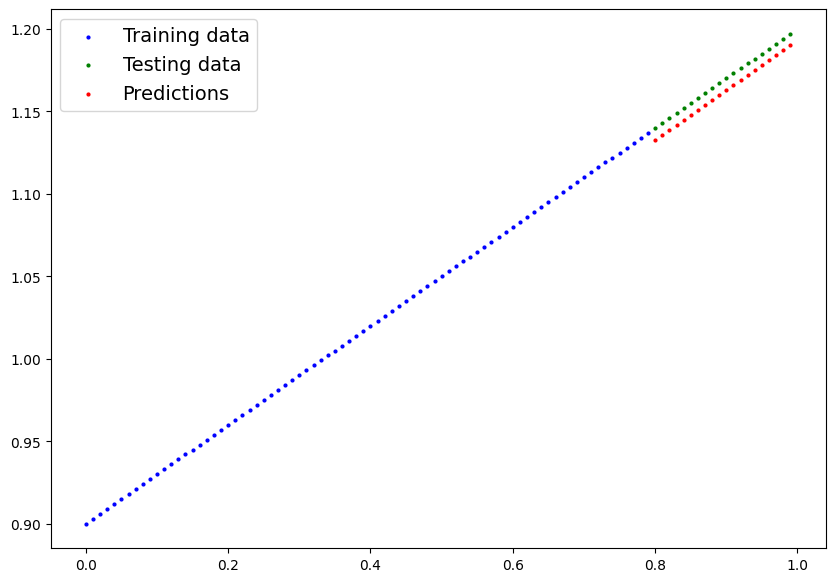

In [36]:
# Plot the predictions (these may need to be on a specific device)
plot_predictions(predictions=y_preds.cpu().numpy())

5. Save your trained model's state_dict() to file.
Create a new instance of your model class you made in 2. and load in the state_dict() you just saved to it.
Perform predictions on your test data with the loaded model and confirm they match the original model predictions from 4.

In [38]:
from pathlib import Path

# 1. Create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path
MODEL_NAME = "01_pytorch_workflow_model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(), # only saving the state_dict() only saves the models learned parameters
           f=MODEL_SAVE_PATH)

Saving model to: models/01_pytorch_workflow_model_0.pth


In [41]:
# Create new instance of model and load saved state dict (make sure to put it on the target device)
loaded_model_0 = LinearRegressionModel().to(device)
loaded_model_0.load_state_dict(torch.load(MODEL_SAVE_PATH))

<ipython-input-41-11f5b112f700>:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_model_0.load_state_dict(torch.load(MODEL_SAVE_PATH))


<All keys matched successfully>

In [42]:
# Make predictions with loaded model and compare them to the previous
loaded_model_0.eval()
with torch.inference_mode():
    loaded_model_preds = loaded_model_0(X_test)
y_preds == loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]], device='cuda:0')